# Статистический анализ данных

# Проект "Определение перспективного тарифа для телеком-компании"

<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-помесячной-выручки-с-каждого-пользователя" data-toc-modified-id="Расчёт-помесячной-выручки-с-каждого-пользователя-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёт помесячной выручки с каждого пользователя</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

**Цель проекта:** проанализировать поведение клиентов разных тарифов и дать рекомендации по оптимизации тарифных планов

**Задачи**

1. Изучить данные
2. Проверсти предобработку данных  
    - Анализ пропусков    
    - Поиск артефактов (аномалий)    
    - Проверка типов записи данных   
    - Поиск дубликатов   
3. Рассчитать производные параметры
    - Количество сделанных звонков и израсходованных минут разговора по месяцам
    - Количество отправленных сообщений по месяцам
    - Объем израсходованного интернет-трафика по месяцам
    - Помесячная выручка с каждого пользователя
4. Провести исследовательский анализ данных
    - Описать поведение клиентов оператора
    - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
5. Проверить статистические гипотезы:
    - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Описание тарифов**

**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей


*Примечание*

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

**Данные**

- Таблица users (информация о пользователях):
    - user_id — уникальный идентификатор пользователя
    - first_name — имя пользователя
    - last_name — фамилия пользователя
    - age — возраст пользователя (годы)
    - reg_date — дата подключения тарифа (день, месяц, год)
    - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    - city — город проживания пользователя
    - tariff — название тарифного плана
- Таблица calls (информация о звонках):
    - id — уникальный номер звонка
    - call_date — дата звонка
    - duration — длительность звонка в минутах
    - user_id — идентификатор пользователя, сделавшего звонок
- Таблица messages (информация о сообщениях):
    - id — уникальный номер сообщения
    - message_date — дата сообщения
    - user_id — идентификатор пользователя, отправившего сообщение
- Таблица internet (информация об интернет-сессиях):
    - id — уникальный номер сессии
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - session_date — дата интернет-сессии
    - user_id — идентификатор пользователя
- Таблица tariffs (информация о тарифах):
    - tariff_name — название тарифа
    - rub_monthly_fee — ежемесячная абонентская плата в рублях
    - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    - messages_included — количество сообщений в месяц, включённых в абонентскую плату
    - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
    
**Инструментарий:**

- *библиотеки:* pandas, matplotlib, numpy, functools, scipy
- *работа с данными:* read_csv, info, try-except, set_option, isna, sum, fillna, duplicated, reset_index, groupby, len, loc, value_counts, astype,  drop, apply, pivot_table, rename, query, to_datetime, ceil, sort_values, count, describe, merge, reduce, var, std, unique
- *статистический анализ:* ttest_ind
- *работа с графиками:* hist, boxplot
- *циклы for, определение функций, lambda-функции, конструкция if-else*

## Изучение данных из файла

Импорт библиотек и настройки отображения

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from scipy import stats as st

In [2]:
#Показывать все колонки
pd.set_option('display.max_columns', None)
#Вещественные числа показывать в легко читаемом формате
pd.options.display.float_format = '{: .2f}'.format

Импорт данных

In [3]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv', index_col=0)
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except:
    calls = pd.read_csv('E:/IT/Yandex/Projects/datasets/stat_calls.csv')
    internet = pd.read_csv('E:/IT/Yandex/Projects/datasets/stat_internet.csv')
    messages = pd.read_csv('E:/IT/Yandex/Projects/datasets/stat_messages.csv')
    tariffs = pd.read_csv('E:/IT/Yandex/Projects/datasets/stat_tariffs.csv')
    users = pd.read_csv('E:/IT/Yandex/Projects/datasets/stat_users.csv')

Знакомство с данными

In [4]:
# Определим функцию для знакомства с базой данных и проверки её на явные дубликаты
def database_check(db):
    print('Случайные 2 строки базы данных')
    display(db.sample(2, random_state=0))
    print('---')
    print('Общая информация о базе данных')
    db.info()
    print('---')
    print('Пропущенных значений в строках:')
    print(db.isna().sum())
    print('---')
    print('Явных дубликатов в базе данных:', db.duplicated().sum())

In [5]:
# Определим список баз данных для проверки
dtb = {
    "users": users,
    "calls": calls,
    "messages": messages,
    "internet": internet,
    "tariffs": tariffs
    }
# Проведем знакомство с базами данных
for name, database in dtb.items():
    print('База данных', name)
    database_check(database)

База данных users
Случайные 2 строки базы данных


,Unnamed: 0,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
90,90,1090,54,2018-12-03,Череповец,Екатерина,Астафьева,2018-10-11,ultra
254,254,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra


---
Общая информация о базе данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   user_id     500 non-null    int64 
 2   age         500 non-null    int64 
 3   churn_date  38 non-null     object
 4   city        500 non-null    object
 5   first_name  500 non-null    object
 6   last_name   500 non-null    object
 7   reg_date    500 non-null    object
 8   tariff      500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB
---
Пропущенных значений в строках:
Unnamed: 0      0
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
---
Явных дубликатов в базе данных: 0
База данных calls
Случайные 2 строки базы данных


,Unnamed: 0,id,call_date,duration,user_id
40510,40510,1100_33,2018-09-23,0.00,1100
150407,150407,1377_1254,2018-04-03,12.26,1377


---
Общая информация о базе данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  202607 non-null  int64  
 1   id          202607 non-null  object 
 2   call_date   202607 non-null  object 
 3   duration    202607 non-null  float64
 4   user_id     202607 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ MB
---
Пропущенных значений в строках:
Unnamed: 0    0
id            0
call_date     0
duration      0
user_id       0
dtype: int64
---
Явных дубликатов в базе данных: 0
База данных messages
Случайные 2 строки базы данных


,Unnamed: 0,id,message_date,user_id
94381,94381,1385_1090,2018-05-03,1385
109956,109956,1443_55,2018-12-02,1443


---
Общая информация о базе данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    123036 non-null  int64 
 1   id            123036 non-null  object
 2   message_date  123036 non-null  object
 3   user_id       123036 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.8+ MB
---
Пропущенных значений в строках:
Unnamed: 0      0
id              0
message_date    0
user_id         0
dtype: int64
---
Явных дубликатов в базе данных: 0
База данных internet
Случайные 2 строки базы данных


,Unnamed: 0,id,mb_used,session_date,user_id
26617,26617,1092_283,828.84,2018-08-02,1092
112390,112390,1380_519,912.76,2018-07-20,1380


---
Общая информация о базе данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
---
Пропущенных значений в строках:
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
---
Явных дубликатов в базе данных: 0
База данных tariffs
Случайные 2 строки базы данных


,Unnamed: 0,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1,1000,30720,3000,1950,150,1,1,ultra
0,0,50,15360,500,550,200,3,3,smart


---
Общая информация о базе данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             2 non-null      int64 
 1   messages_included      2 non-null      int64 
 2   mb_per_month_included  2 non-null      int64 
 3   minutes_included       2 non-null      int64 
 4   rub_monthly_fee        2 non-null      int64 
 5   rub_per_gb             2 non-null      int64 
 6   rub_per_message        2 non-null      int64 
 7   rub_per_minute         2 non-null      int64 
 8   tariff_name            2 non-null      object
dtypes: int64(8), object(1)
memory usage: 272.0+ bytes
---
Пропущенных значений в строках:
Unnamed: 0               0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute          

Поверим временной охват данных

In [6]:
print('Данные охватывают период с {start} по {end}'.format(start=internet['session_date'].min(), end=internet['session_date'].max()))

Данные охватывают период с 2018-01-01 по 2018-12-31


Данные охватывают ровно весь 2018 год

### Вывод

Исходные данные представлены в пяти таблицах. В колонке идентификаторов базы данных internet неверное прочтение имени колонки. Это исправлено в условиях импорта данных. В остальном данные хорошо подготовлены и не содержат пропусков или дубликатов. Единственное поле, которое частично заполнено значениями - это churn_date в таблице информации о пользователях, которое содержит информацию о дате прекращения пользования тарифом. Отсутствие данных указывает на то, что пользователи всё ещё пользуются выбранным тарифом, поэтому заполнять это поле значениями мы не будем.
Из подготовительных мер можно перевести даты пользования услугами связи в формат datetime и значения времени телефонных звонков в целочисленный формат с округлением вверх. Можно было бы перевести и значения использованного интернет-трафика в целочисленные для удобства обработки и хранения данных, но возникает риск ошибочного учета или не учета дополнительных гигабайт сверх пакета при округлении значений, поэтому делать этого мы пока не будем.

## Предобработка данных

Переведем формат полей в более подходящий

In [7]:
#Изменим имя колонки tariff в таблице users, чтобы в дальнейшем было проще связать эти две таблицы
users = users.rename(columns={'tariff': 'tariff_name'})
#Перевод всех дат в формат datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
#Округление минут звонков в целочисленные значения
calls['duration'] = np.ceil(calls['duration']).astype(int)

Добавим отдельную колонку месяца пользования услугами связи, так как весь наш анализ строится по месяцам

In [8]:
calls['month'] = calls['call_date'].astype('datetime64[M]')
messages['month'] = messages['message_date'].astype('datetime64[M]')
internet['month'] = internet['session_date'].astype('datetime64[M]')

Проверим, как распределяются пользователи по городам

In [9]:
users.groupby('city')['user_id'].count().sort_values(ascending=False).head(10)

city
Москва              99
Санкт-Петербург     39
Новосибирск         16
Казань              14
Омск                14
Уфа                 12
Набережные Челны    11
Краснодар           11
Екатеринбург        11
Ульяновск           11
Name: user_id, dtype: int64

Закономерно, наибольшее относительное число пользователей в столицах, в остальных городах сильно меньше

Построим гистограммы значений в таблицах, чтобы оценить нормальность распределения данных

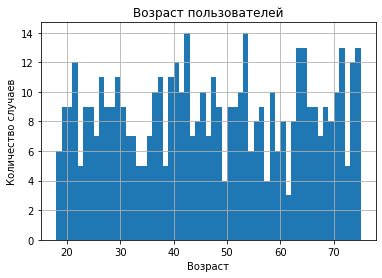

In [10]:
users['age'].hist(bins=57)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество случаев')
plt.show()

Возраст распределён довольно странно и явно распределение отличается от нормального.
Поскольку по умолчанию мы знаем, что пользователи разделены на две группы по использованию тарифного плана, посмотрим на их соотношение в плане возраста

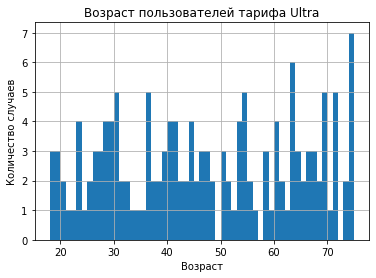

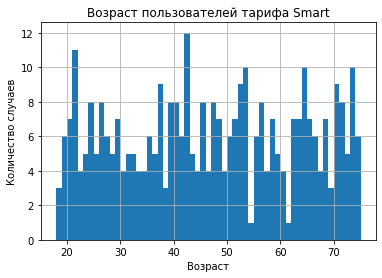

In [11]:
users.query('tariff_name == "ultra"')['age'].hist(bins=57)
plt.title('Возраст пользователей тарифа Ultra')
plt.xlabel('Возраст')
plt.ylabel('Количество случаев')
plt.show()

users.query('tariff_name == "smart"')['age'].hist(bins=57)
plt.title('Возраст пользователей тарифа Smart')
plt.xlabel('Возраст')
plt.ylabel('Количество случаев')
plt.show()

Разительной разницы в возрасте использования тарифных планов не наблюдается. Можно предположить, что генеральная совокупность данных была стратифицирована по возрасту и для каждой категории вычленена доля для выборки. 

Посмотрим, как распределяются пользователи по выбору тарифного плана

In [12]:
print('Пользователей тарифом Ultra:', users.query('tariff_name == "ultra"')['user_id'].count())
print('Из них прекратили им пользоваться:', users.query('tariff_name == "ultra"')['churn_date'].count())
print('')
print('Пользователей тарифом Smart:', users.query('tariff_name == "smart"')['user_id'].count())
print('Из них прекратили им пользоваться:', users.query('tariff_name == "smart"')['churn_date'].count())
print('')
print('Процентная доля в выборке клиентов с тарифом Ultra: {one}%, с тарифом Smart: {two}%'.format(one=np.ceil(users.query('tariff_name == "ultra"')['user_id'].count() / len(users) * 100).astype(int), two=int(users.query('tariff_name == "smart"')['user_id'].count() / len(users) * 100)))

Пользователей тарифом Ultra: 149
Из них прекратили им пользоваться: 15

Пользователей тарифом Smart: 351
Из них прекратили им пользоваться: 23

Процентная доля в выборке клиентов с тарифом Ultra: 30%, с тарифом Smart: 70%


Данные распределены вполне логично, что более дорогим тарифом пользуется меньше людей, чем более дешевым. Соотношение прекративших пользоваться тарифом в целом тоже логично.

Проверим гистограммы и описательную статистику основных численных показателей: суммарной продолжительности телефонных звонков, количестве отправленных сообщений и потраченных мегабайт интернет-трафика

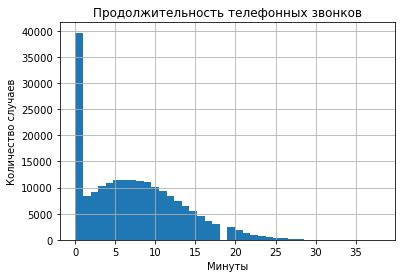

,Unnamed: 0,duration,user_id
count,162994.00,162994.00,162994.00
mean,101389.92,8.90,1254.15
std,58502.91,5.35,144.75
min,2.00,1.00,1000.00
25%,50726.25,5.00,1126.00
50%,101417.50,8.00,1261.00
75%,152104.75,12.00,1379.00
max,202606.00,38.00,1499.00


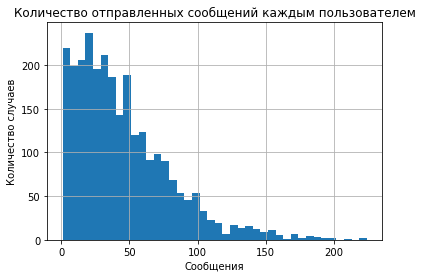

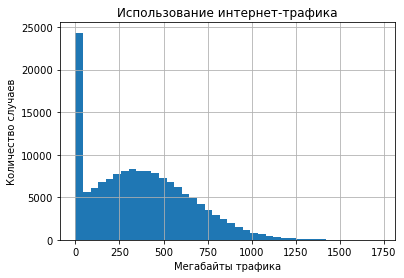

,Unnamed: 0,mb_used,user_id
count,129798.00,129798.00,129798.00
mean,74978.64,426.09,1253.05
std,43047.14,255.60,143.78
min,0.00,0.03,1000.00
25%,37675.25,227.46,1132.00
50%,75253.00,400.54,1252.00
75%,112247.75,592.95,1380.00
max,149395.00,1724.83,1499.00


In [13]:
calls['duration'].hist(bins=40)
plt.title('Продолжительность телефонных звонков')
plt.xlabel('Минуты')
plt.ylabel('Количество случаев')
plt.show()
display(calls.query('duration > 0').describe())

messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()['id'].hist(bins=40)
plt.title('Количество отправленных сообщений каждым пользователем')
plt.xlabel('Сообщения')
plt.ylabel('Количество случаев')
plt.show()

internet['mb_used'].hist(bins=40)
plt.title('Использование интернет-трафика')
plt.xlabel('Мегабайты трафика')
plt.ylabel('Количество случаев')
plt.show()
display(internet.query('mb_used > 0').describe())

Для звонков и пользования интернета очень велика доля нулевых значений, которая означает пропущенные звонки и отсутствие фактического пользования интернетом. В остальном диапазоне данные имеют нормальное распределение с уклоном вправо, что логично.
В среднем в день пользователи звонят 9 минут и расходуют 400 Мб интернет-трафика.
Количество смс-сообщений от каждого пользователя тоже распределено логично, хоть и не имеет классического вида нормального распределения. Большниство пользователей отправляют до 100 смс в месяц.

### Вывод

Распредедение длительности звонков и потраченного интернет-трафика укладывается в нормальное распределение, за вычетом нулевых значений. Рассылка смс тоже выглядит логичной, в данных ошибок не обнаружено. Из 500 пользователей, по которым проведен анализ, большинство в относительном выражении из Москвы и СПб, также 2/3 имеют более дешевый тариф smart, а 1/3 более дорогой ultra, всё логично.
Неправдоподобно выглядит выборка по возрасту пользователей, общая и по категориям тарифа, чьё распределение отличается от нормального. Можно предположить, что генеральная совокупность данных была стратифицирована по возрасту и для каждой категории вычленена доля для выборки. 

## Расчёт помесячной выручки с каждого пользователя

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- итоговую помесячную выручку с каждого пользователя.

In [14]:
#Группировка звонков по пользователям и месяцам
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls_pivot.columns=['user_id', 'month', 'call_count', 'call_sum']
display(calls_pivot.head(2))
#Группировка сообщений по пользователям и месяцам
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_pivot.columns=['user_id', 'month', 'messages_count']
display(messages_pivot.head(2))
#Группировка интернет-трафика по пользователям и месяцам
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['count', 'sum']).reset_index()
internet_pivot.columns=['user_id', 'month', 'inet_count', 'inet_sum']
display(internet_pivot.head(2))

,user_id,month,call_count,call_sum
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172


,user_id,month,messages_count
0,1000,2018-05-01,22
1,1000,2018-06-01,60


,user_id,month,inet_count,inet_sum
0,1000,2018-05-01,5,2253.49
1,1000,2018-06-01,49,23233.77


Используя временные переменные, соединим все 5 табличек в одну общую

In [15]:
# Соединим сгруппированные таблицы методом reduce
data_frames = [calls_pivot, messages_pivot, internet_pivot]
data_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','month'], how='outer'), data_frames)
# Присоединение базы данных users
data_merged2 = data_merged.merge(users, on='user_id', how='outer') 
# Присоединение базы данных tariffs
muser = data_merged2.merge(tariffs, on='tariff_name', how='outer') 

Проверим, имеются ли пользователи, которые никогда не пользовались услугами связи и удалим такие значения, если имеются

In [16]:
display(muser[muser['month'].isnull()])

,user_id,month,call_count,call_sum,messages_count,inet_count,inet_sum,Unnamed: 0_x,age,churn_date,city,first_name,last_name,reg_date,tariff_name,Unnamed: 0_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaT,NaN,NaN,NaN,NaN,NaN,128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1,1000,30720,3000,1950,150,1,1
3215,1371,NaT,NaN,NaN,NaN,NaN,NaN,371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,0,50,15360,500,550,200,3,3


In [17]:
muser = muser.drop(muser.query("month.isnull() == True").reset_index()['index'])

Заполним пропуски значений и оптимизируем формат хранения данных на целочисленный

In [18]:
muser['call_count'] = muser['call_count'].fillna(0).astype(int)
muser['call_sum'] = muser['call_sum'].fillna(0).astype(int)
muser['messages_count'] = muser['messages_count'].fillna(0).astype(int)
muser['inet_count'] = muser['inet_count'].fillna(0).astype(int)
muser['inet_sum'] = muser['inet_sum'].fillna(0).astype(int)

Расчитаем помесячную выручку с каждого пользователя

In [19]:
#Расчёт разности между реально израсходованными ресурсами и количеством, включенным в пакет
muser['calls_minus'] = muser['call_sum'] - muser['minutes_included']
muser['messages_minus'] = muser['messages_count'] - muser['messages_included']
muser['inet_minus'] = muser['inet_sum'] - muser['mb_per_month_included']
#Обнуление всех значений, где лимит пакета услуг не был перерасходован
muser.loc[muser['calls_minus'] < 0, 'calls_minus'] = 0
muser.loc[muser['messages_minus'] < 0, 'messages_minus'] = 0
muser.loc[muser['inet_minus'] < 0, 'inet_minus'] = 0
#Расчёт дополнительной суммы, которую нужно заплатить пользователю за оказание услуг сверх пакета
muser['call_pay'] = muser['calls_minus'] * muser['rub_per_minute']
muser['message_pay'] = muser['messages_minus'] * muser['rub_per_message']
muser['inet_pay'] = np.ceil(muser['inet_minus'] / 1024) * muser['rub_per_gb']
muser['inet_pay'] = muser['inet_pay'].astype(int)
#Расчёт итоговой оплаты услуг пользователем
muser['pay'] = muser['call_pay'] + muser['message_pay'] + muser['inet_pay'] + muser['rub_monthly_fee']

### Вывод

Для звонков, сообщений и интернет-трафика были созданы сводные таблицы с объединением по пользователям и месяцам. В дальнейшнем эти таблицы были объединены в единую таблицу muser, где содержатся данные о пользователях, условиях тарифов, и пользовании услугами связи. Для каждого пользователя была расчитана помесячная выручка, включающая в себя абонентскую плату и плату за пользованием услугами связи сверх установленных тарифным планом лимитов. 

## Анализ данных

В связи с тем, что наша задача - это понять, какой тариф более выгодный, разделим общую базу данных на две:
- ultra_users - база данных всех пользователей тарифа ultra
- smart_users - база данных всех пользователей тарифа smart

In [20]:
ultra_users = muser.query('tariff_name == "ultra"')
smart_users = muser.query('tariff_name == "smart"')

Посмотрим на поведение клиентов, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

Пользователи тарифа Ultra


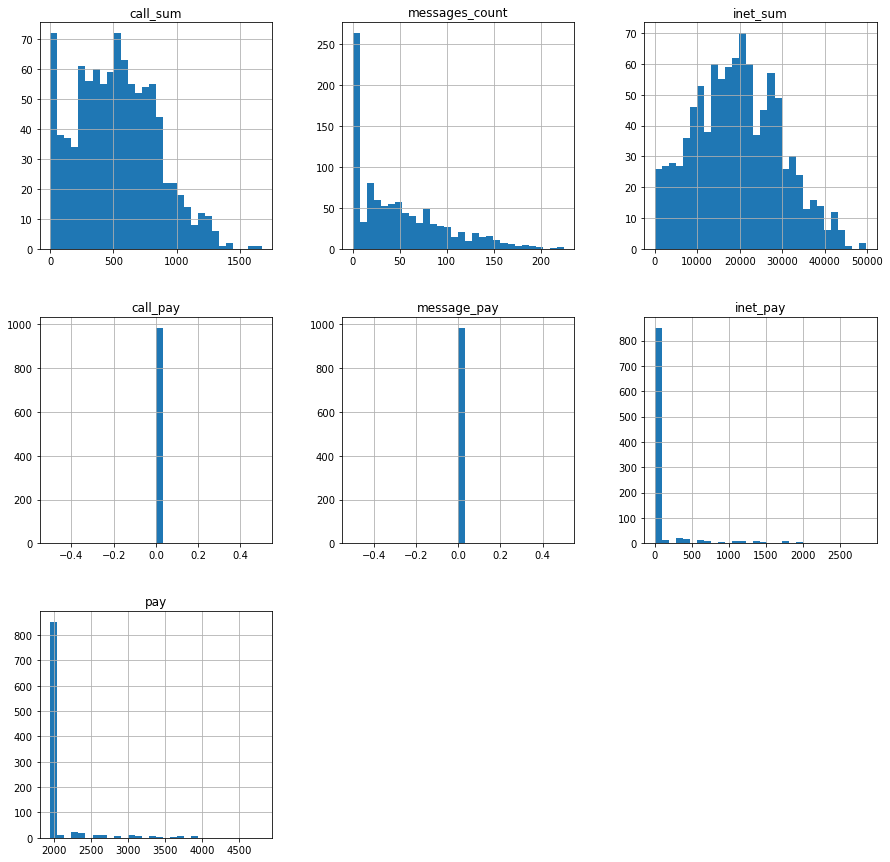

,call_sum,messages_count,inet_sum,call_pay,message_pay,inet_pay,pay
count,985.00,985.00,985.00,985.00,985.00,985.00,985.00
mean,526.62,49.36,19468.33,0.00,0.00,120.15,2070.15
std,317.61,47.80,10087.17,0.00,0.00,376.19,376.19
min,0.00,0.00,0.00,0.00,0.00,0.00,1950.00
25%,284.00,6.00,11770.00,0.00,0.00,0.00,1950.00
50%,518.00,38.00,19308.00,0.00,0.00,0.00,1950.00
75%,752.00,79.00,26837.00,0.00,0.00,0.00,1950.00
max,1673.00,224.00,49745.00,0.00,0.00,2850.00,4800.00


Дисперсия значений платежей для пользователей тарифа Ultra: 141373
-----
Пользователи тарифа Smart


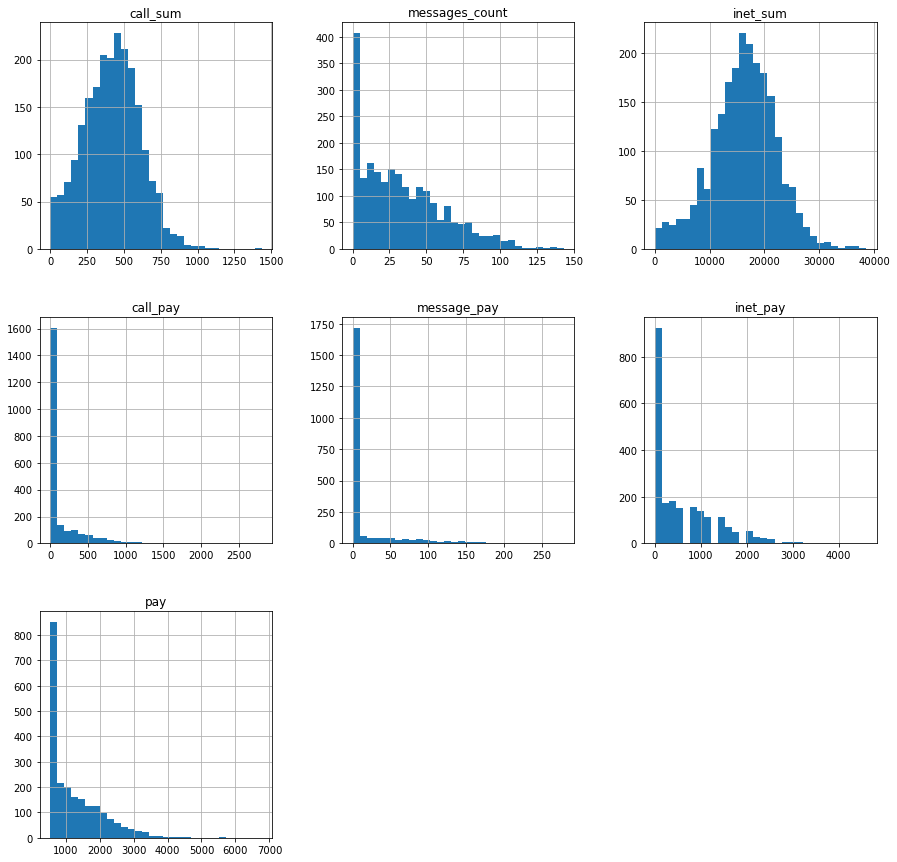

,call_sum,messages_count,inet_sum,call_pay,message_pay,inet_pay,pay
count,2229.00,2229.00,2229.00,2229.00,2229.00,2229.00,2229.00
mean,417.93,33.38,16207.88,124.82,17.40,597.76,1289.97
std,190.31,28.23,5870.48,254.04,40.33,736.56,818.40
min,0.00,0.00,0.00,0.00,0.00,0.00,550.00
25%,282.00,10.00,12643.00,0.00,0.00,0.00,550.00
50%,422.00,28.00,16506.00,0.00,0.00,400.00,1023.00
75%,545.00,51.00,20042.00,135.00,3.00,1000.00,1750.00
max,1435.00,143.00,38552.00,2805.00,279.00,4600.00,6770.00


Дисперсия значений платежей для пользователей тарифа Smart: 669485


In [21]:
print('Пользователи тарифа Ultra')
ultra_users[['call_sum', 'messages_count', 'inet_sum', 'call_pay', 'message_pay', 'inet_pay', 'pay']].hist(bins=30, figsize=(15,15))
plt.show()
display(ultra_users[['call_sum', 'messages_count', 'inet_sum', 'call_pay', 'message_pay', 'inet_pay', 'pay']].describe())
print('Дисперсия значений платежей для пользователей тарифа Ultra:', int(np.var(ultra_users['pay'])))
print('-----')

print('Пользователи тарифа Smart')
smart_users[['call_sum', 'messages_count', 'inet_sum', 'call_pay', 'message_pay', 'inet_pay', 'pay']].hist(bins=30, figsize=(15,15))
plt.show()
display(smart_users[['call_sum', 'messages_count', 'inet_sum', 'call_pay', 'message_pay', 'inet_pay', 'pay']].describe())
print('Дисперсия значений платежей для пользователей тарифа Smart:', int(np.var(smart_users['pay'])))

In [22]:
print('Процент случаев, когда пользователи тарифом ultra платили за связь больше, чем абонентскую плату: {0:.0f}%'.format(len(ultra_users[ultra_users['pay'] > ultra_users['rub_monthly_fee']]) / len(ultra_users['pay']) * 100))
print('Процент случаев, когда пользователи тарифом smart платили за связь больше, чем абонентскую плату: {0:.0f}%'.format(len(smart_users[smart_users['pay'] > smart_users['rub_monthly_fee']]) / len(smart_users['pay']) * 100))

Процент случаев, когда пользователи тарифом ultra платили за связь больше, чем абонентскую плату: 14%
Процент случаев, когда пользователи тарифом smart платили за связь больше, чем абонентскую плату: 75%


Показатели двух групп пользователей значительно различаются.

**По пользованию услугами связи:**

1. Пользователи тарифа Ультра в среднем звонят 526 минут в месяц, Смарт всего на 20% меньше - 417 минут. При этом многие в тарифе Ультра не звонят совсем, в тарифе Смарт таких практически нет
2. Пользователи Ультра в среднем пересылают 49 сообщений в месяц, Смарт - 33, то есть на 33% меньше, при этом в обоих группах высока доля тех, кто не пересылает ни одного сообщения вовсе
3. Пользователи Ультра в среднем пользуются 20 Гб трафика, Смарт всего на 20% меньше - 16 Гб

Стандартное отклонение высоко для всех тарифов: 
1. Звонки: Ультра 317 минут и Смарт 190 минут
2. Сообщения: Ультра 48 сообщений и Смарт 28 сообщений
3. Интернет: Ультра 10 Гб, Смарт 6 Гб

Распределение большинства параметров близко к нормальному, для сообщений - с выраженной асимметрией вправо.

**По выручке группы тоже значительно различаются в деталях.**

У пользователей тарифа Ультра нет переплат за звонки и сообщения, так как нет их перерасходывания. Интернета хватает подавляющему количеству пользователей, переплачивают только 14% клиентов сумму от 150 до 2000 рублей.

У пользователей тарифа Смарт переплаты наоборот, крайне распространены. Больше половины клиентов не расходуют лимитов на звонки и сообщения вообще, а кто расходует, то не очень много, основная статья переплат состоит из пользования услугами интернета. Около половины пользователей расходуют интернета боьлше, чем предусмотрено, за что платят в среднем плюс 400-1000 рублей в месяц. 
Таким образом, 75% клиентов с тарифом Смарт расходуют в месяц помимо абонентской планы ещё 400-1200 рублей на дополнительный интернет, звонки и смс.

### Вывод

По характеру использования, обе группы пользователей довольно похожи. В большинстве случаев наблюдается нормальный характер распределения значений выбранных характеристик. Только пользователи тарифом Ультра пользуются в среднем на 20-30% большим количеством услуг, чем пользователи тарифа Смарт. Интересно, что разница в абонентской плате между этими тарифами составляет 60%, то есть в 2-3 раза выше, чем разница в количестве предоставляемых услуг.

В подавляющем количестве случаев клиентам тарифа Ультра (86% случаев) хватает предоставленного пакета услуг, ровно обратная ситуация для тех, кто выбрал тариф Смарт (только 25% случаев). 
Основная доля случаев оплаты дополнительных услуг пользователями обоих тарифов приходится на перерасход интернет-трафика. Судя по стандартному отклонению, пользователи тарифа Ультра расходуют трафик более вольготно, потому что им дан высокий лимит. При лимите трафика в 30 Гб и среднем пользованием интернетом в 20 Гб, стандартное отклонение составляет 10 Гб, то есть только совсем незначительное количество случаев приходится на превышение 30 Гб. В ту же очередь для тарифа Смарт лимит остановлен в 15 Гб, что совпадает со средними тратами пользователей и многие стараются из него выходить не сильно, в связи с чем стандартное отклонение расхода трафика почти в 2 раза меньше, чем у пользователей Ультра - 6 Гб.

Общая вариативность платежей для двух тарифов различается почти в 5 раз. Судя по дисперсии значений платежей, пользователи тарифа Ультра имеют стабильный уровень платежей каждый месяц, а пользователи тарифа Смарт платят каждый месяц разные суммы.

## Проверка гипотез

Перед проверкой гипотез необходимо ещё раз изучить базу данных на предмет выбросов. Это, скорее всего, реальные данные, без ошибок, но для проверки гипотез о равенстве среднего такие выбросы будут давать ложную картину, увеличивая дисперсию и среднее значение

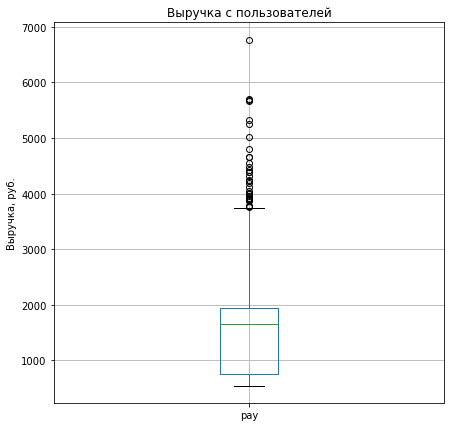

count    3214.00
mean     1529.08
std       798.25
min       550.00
25%       750.00
50%      1653.50
75%      1950.00
max      6770.00
Name: pay, dtype: float64

In [23]:
muser.boxplot('pay', figsize=(7,7))
plt.title('Выручка с пользователей')
plt.ylabel('Выручка, руб.')
plt.show()
muser['pay'].describe()

Как можно увидеть на графике, медиана сильно смещена к высоким значениям, выбросов в первой квартили нет (так как абонентская плата имеется для всех тарифов по умолчанию), а вот в четвертой квартили - много. Применим правило 3 сигм для того, чтобы отфильтровать все выбивающиеся значения

In [24]:
outlier_up = int(muser['pay'].mean() + muser['pay'].std() * 3)
print('Значений исключено из базы данных: ', muser.query('pay > @outlier_up')['pay'].count())
muser = muser.query('pay <= @outlier_up')

Значений исключено из базы данных:  24


**Проверим следующие гипотезы:**
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Ещё раз сравним гистограммы распределения значений платежей двух групп пользователей услугами связи

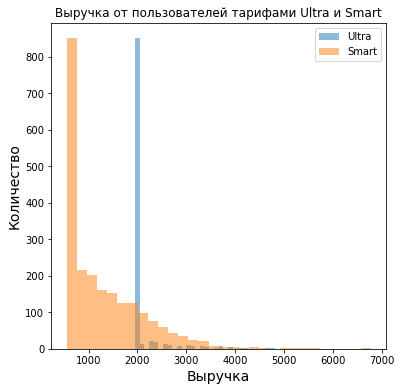

In [25]:
plt.figure(figsize=(6,6))
plt.hist(ultra_users['pay'], bins=30, alpha=0.5, label="Ultra")
plt.hist(smart_users['pay'], bins=30, alpha=0.5, label="Smart")
plt.xlabel("Выручка", size=14)
plt.ylabel("Количество", size=14)
plt.title("Выручка от пользователей тарифами Ultra и Smart")
plt.legend(loc='upper right')
plt.show()

Очевидны максимумы в 550 и 1950 рублей, составляющие абонентскую плату для пользователей тарифами Smart и Ultra. Но подавляющее количество трат для обоих тарифов лежит в пределах 4000 рублей, причём видно, как в ценовом диапазоне 2000+ рублей пользователи тарифа Smart значительно больше переплачивают по сравнению с пользователями тарифа Ultra.

**Проверим гипотезу №1.** Средняя выручка пользователей тарифов Ультра и Смарт различаются.
Запишем её следующим образом:

H0 - Средняя выручка с пользователей тарифа Ультра равна средней выручке с пользователей тарифа Смарт

Н1 - Средняя выручка с пользователей тарифа Ультра не равна средней выручке с пользователей тарифа Смарт

In [26]:
#Создадим два отдельных массива с информацией только о выручке с каждого пользователя за каждый месяц
ultra_pay = ultra_users['pay']
smart_pay = smart_users['pay']

В теории, если выборки не очень большие, то мы можем сравнить просто средние значений каждой выборки. Будем их иметь ввиду для контроля качества статистической проверки выборок

In [27]:
print('Средняя выручка с одного клиента тарифа Ultra за месяц, руб.:', int(ultra_pay.mean()))
print('Средняя выручка с одного клиента тарифа Smart за месяц, руб.:', int(smart_pay.mean()))
print('')
print('Общая выручка со всех клиентов тарифа Ultra за все месяца, руб.:', ultra_pay.sum())
print('Общая выручка со всех клиентов тарифа Smart за все месяца, руб.:', smart_pay.sum())

Средняя выручка с одного клиента тарифа Ultra за месяц, руб.: 2070
Средняя выручка с одного клиента тарифа Smart за месяц, руб.: 1289

Общая выручка со всех клиентов тарифа Ultra за все месяца, руб.: 2039100
Общая выручка со всех клиентов тарифа Smart за все месяца, руб.: 2875351


Проведем сравнение с помощью t-критерия Стьюдента для двух независимых выборок с разными дисперсиями. Поскольку выручка считается по большому количеству клиентов, нам нужна наиболее точная информация, для чего выставим пороговое значение в 5%

In [28]:
#Зададим критерий значимости
alpha = 0.05

#Расчитаем p-значение
results_pay_mean = st.ttest_ind(
    ultra_pay, 
    smart_pay,
    equal_var=False)

print('p-значение:', results_pay_mean.pvalue)

#Сравним полученный результат с критерием значимости
if results_pay_mean.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Оба метода показали, что средняя выручка с двух тарифов разная. Средний чек с пользователя тарифа Ультра почти на 40% больше, чем с пользователя тарифом Смарт, несмотря на то, что пользователи тарифа Смарт значительно переплачивают за дополнительный интернет трафик. Дело в высокой базовой стоимости тарифного плана Ультра (в 3,5 раза больше, чем тариф Смарт). 
Однако общая выручка со всех пользователей в итоге для тарифа Смарт выше из-за большей популярности тарифа. Доля выручек составляет 40% и 60% для Ультра и Смарт соответственно. 

**Проверим гипотезу №2.** Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Запишем её следующим образом:

H0 - Средняя выручка с пользователей в городе Москва равна средней выручке с пользователей в остальных городах

Н1 - Средняя выручка с пользователей в городе Москва не равна средней выручке с пользователей в остальных городах

Сначала проверим, нет ли дубликатов Москвы

In [29]:
muser['city'].unique()

array(['Краснодар', 'Москва', 'Новокузнецк', 'Иваново', 'Омск', 'Уфа',
       'Томск', 'Санкт-Петербург', 'Тверь', 'Ярославль', 'Тюмень',
       'Ростов-на-Дону', 'Калуга', 'Тула', 'Волгоград', 'Саранск',
       'Иркутск', 'Череповец', 'Новосибирск', 'Брянск', 'Тольятти',
       'Нижний Тагил', 'Воронеж', 'Махачкала', 'Пермь', 'Сургут', 'Пенза',
       'Мурманск', 'Набережные Челны', 'Самара', 'Нижний Новгород',
       'Кемерово', 'Кострома', 'Оренбург', 'Магнитогорск', 'Астрахань',
       'Нижневартовск', 'Челябинск', 'Курган', 'Красноярск',
       'Владивосток', 'Смоленск', 'Владимир', 'Казань', 'Саратов',
       'Севастополь', 'Рязань', 'Екатеринбург', 'Стерлитамак',
       'Ульяновск', 'Балашиха', 'Барнаул', 'Киров', 'Сочи', 'Вологда',
       'Чебоксары', 'Чита', 'Петрозаводск', 'Хабаровск', 'Ставрополь',
       'Улан-Удэ', 'Курск', 'Якутск', 'Химки', 'Владикавказ', 'Ижевск',
       'Орёл', 'Белгород', 'Архангельск', 'Липецк', 'Волжский', 'Тамбов',
       'Калининград', 'Новороссий

Дубликатов не найдено, Москва одна такая. Поделим базу данных на Москву и замкадье 

In [30]:
#Создадим два отдельных массива с информацией только о выручке с каждого пользователя за каждый месяц в Москве и остальных городах
msk_pay = muser.query('city == "Москва"')['pay']
nomsk_pay = muser.query('city != "Москва"')['pay']

Как и при проверке первой гипотезы, расчитаем средние значения по выборкам, раз их размер позволяет это сделать

In [31]:
print('Средняя выручка с одного клиента в Москве за месяц, руб.:', int(msk_pay.mean()))
print('Средняя выручка с одного клиента не в Москве за месяц, руб.:', int(nomsk_pay.mean()))
print('')
print('Общая выручка со всех клиентов в Москве за все месяца, руб.:', msk_pay.sum())
print('Общая выручка со всех клиентов не в Москве за все месяца, руб.:', nomsk_pay.sum())

Средняя выручка с одного клиента в Москве за месяц, руб.: 1532
Средняя выручка с одного клиента не в Москве за месяц, руб.: 1498

Общая выручка со всех клиентов в Москве за все месяца, руб.: 931555
Общая выручка со всех клиентов не в Москве за все месяца, руб.: 3870021


Проверим статистическим методом, насколько значимо различие в средней выручке

In [32]:
#Зададим критерий значимости
alpha_msk = 0.05

#Расчитаем p-значение
results_pay_msk = st.ttest_ind(
    msk_pay, 
    nomsk_pay,
    equal_var=False)

print('p-значение:', results_pay_msk.pvalue)

#Сравним полученный результат с критерием значимости
if results_pay_msk.pvalue < alpha_msk:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.31145103179503847
Не получилось отвергнуть нулевую гипотезу


Статистическое сравнение двух выборок так же показало, что средняя выручка с клиентов из Москвы и из других регионов равна. А значит общая выручка с москвичей пропорциональна количеству пользователей из Москвы, не более.

### Вывод

- Исследование показало, что средние значения платежей, поступающих от клиентов с разными тарифами, различаются почти на 40%; 
- Разницы между средним платежем от клиента из столицы и из региона практически не существует.

## Общий вывод

**Данные**

Исходные данные представлены в пяти таблицах, содержащих информацию о пользователях, выбранных ими тарифах, количеством потраченных минут разговоров, написанных сообщений и израсходованного интернет-трафика по дням. Данные хорошо подготовлены, не содержат дубликатов, пропущенных значений и откровенных выбросов. Большинство параметров имеют нормальное распределение, кроме параметра возраста клиента. Последнее, скорее всего, свидетельствует о направленной выборке из генеральной совокупности по возрастным категориям. 
В базах данных формат даты был переведен в datetime и формат части других столбцов был оптимизирован. Пять баз данных были собраны в одну базу данных - muser. В ней для каждого пользователя был расчитан показатель прибыльности для компании, по месяцам, который является суммой абонентской платы и доплат за пользованием услугами связи сверх включенного в тариф лимита. 

**Сравнение пользования услугами двух тарифных планов**

В выборке присутствует 30% пользователей тарифа Ultra и 70% пользователей тарифа Smart. 
По характеру использования, обе группы пользователей довольно похожи, только пользователи тарифом Ultra пользуются в среднем на 20-30% большим количеством услуг, чем пользователи тарифа Smart. При этом в 86% случаев пользователям тарифа Ultra достаточно включенных в пакет услуг, в то время как пользователи тарифа Smart не используют дополнительные минуты, сообщения и мегабайты только в 25% случаев. Основная доля случаев оплаты дополнительных услуг пользователями обоих тарифов приходится на перерасход интернет-трафика.

Таким образом, пользователи тарифа Ultra платят за связь по умолчанию в 3,5 раза больше, чем пользователи тарифа Smart, но при этом в подавляющем количестве случаев не доплачивают ничего сверх нормы. Пользователи тарифа Smart доплачивают в среднем до 100% абонентской платы из-за того, что стабильно не умещаются в выставленные тарифом лимиты, в первую очередь, по интернет-трафику.

**Проверка гипотез о различиях в пользовании тарифами**

Во время исследования было выдвинуто 2 гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Первая гипотеза была подтверждена, средняя выручка с пользователей тарифа Ultra больше на 40% средней выручки тарифа Smart.

Вторая гипотеза была опровергнута, средняя выручка с обоих тарифов не зависит от того, зарегистирован клиент в Москве или другом регионе.

**Рекомендации оператору мобильной связи**

1. Тариф Ultra имеет высокое избыточное количество включенных услуг. Судя по выборке, статистически (по правилу трех сигм) пользователи не тратят больше 1477 минут на звонки и 193 сообщений в месяц. Следовательно можно снизить лимиты на включенные услуги вплоть до 1500 минут и 200 сообщений в месяц, то есть в 2 и 5 раз соответственно. Количество включенного интернет-трафика расчитано хорошо, изменять его не стоит.
2. Тариф Smart наоборот, имеет недостаточные лимиты включенных услуг, которые практически совпадают со средним значением использования. Даже одно стандартное отклонение в положительную сторону приводит к перерасходу включенных опций, что выливается в то, что 75% пользователей стабильно тратят больше денег в месяц на услуги связи, чем рассчитывают.
3. Оптимизация тарифов могла бы выглядеть таким образом: тариф Ultra включает 1500 минут звонков, 200 смс и 30 Гб интернет-трафика за немного меньшую цену, чтобы привлечь новых клиентов и удержать старых. Тариф Smart включает 600 минут звонков, 100 смс и 20 Гб интернет-трафика за немного большую или ту же цену. Недополученные средства можно компенсировать увеличением тарифов на перерасход услуг выше лимита, что должно в теории не так сильно влиять на выбор клиента при решении о выборе тарифа.